# Master Fig 2

In [1]:
library(ggplot2)
library(patchwork)

In [2]:
DAYS = c("D0", "D2", "D4", "D6", "D8", "D10", "D12", "D14")

## Load Subfigs

In [3]:
# OSK FRiP
OCT4_frip = readRDS("./subfigs/20200712_OCT4_frip.rds")
SOX2_frip = readRDS("./subfigs/20200712_SOX2_frip.rds")
KLF4_frip = readRDS("./subfigs/20200712_KLF4_frip.rds")

In [4]:
# broser shots
MAP2 = readRDS("./subfigs/20200712_MAP2.rds")
JAKMIP2 = readRDS("./subfigs/20200712_JAKMIP2.rds")
KRT16 = readRDS("./subfigs/20200712_KRT16.rds")
KLK11 = readRDS("./subfigs/20200712_KLK11.rds")
# browser_labels = readRDS("./subfigs/20200623_browser_labels.rds")

In [5]:
# gene score plots
MAP2_gs = readRDS("./subfigs/20200630_MAP2_gs.rds")
JAKMIP2_gs = readRDS("./subfigs/20200630_JAKMIP2_gs.rds")
KRT16_gs = readRDS("./subfigs/20200630_KRT16_gs.rds")
KLK11_gs = readRDS("./subfigs/20200630_KLK11_gs.rds")

### Configs

In [6]:
cluster_config = read.table("../configs/cluster.tsv", comment.char = '', header=T, sep='\t')
cluster_config$colour = as.character(cluster_config$colour)
cluster_config$description = as.character(cluster_config$description)

rownames(cluster_config) = cluster_config$cluster
cluster_config

cluster colour  description            new_cluster
1   1      #F4D5CD Intermediate           12         
2   2      #78A824 Pre-iPSC               15         
3   3      #F01D35 Fibroblast-like         5         
4   4      #E85F6D Fibroblast-like         3         
5   5      #B03743 Fibroblast              1         
6   6      #7C2730 Fibroblast              2         
7   7      #CF175A Fibroblast-like         4         
8   8      #CCCCCC Doublets               17         
9   9      #F7A6C2 Keratinocyte-like       6         
10 10      #A6D854 Pre-iPSC               16         
11 11      #406614 Partially-reprogrammed 14         
12 12      #BD6A37 Intermediate           11         
13 13      #D4B81C Intermediate           10         
14 14      #F0520A Early intermediate      7         
15 15      #F0A118 Intermediate           13         
16 16      #2BB5A3 Neural-like             9         
17 17      #006658 Neural-like             8         
18 18      #9BE89E iPSC                   18

In [7]:
# slight tweak for long name
cluster_config[11, "description"] = "Partially\nreprogrammed"

## Assemble Components

In [8]:
horizontal_spacers <- function(plot, widths=c(0,1,0)) {
    wrap_plots(plot_spacer(), plot, plot_spacer(), widths=widths)
}

vertical_spacers <- function(plot, heights=c(0,1,0)) {
    wrap_plots(plot_spacer(), plot, plot_spacer(), ncol=1, heights=heights)
}

placeholder_plot <- function(text, size=1) {
    df = data.frame(x=c(0), y=c(0), t=c(text))
    ggplot(df)+
    geom_text(aes(x=x,y=y,label=t), size=size)+
    theme_void()+
    theme(panel.border = element_rect(colour = "black", fill=NA, size=0.5),
                                                       plot.margin = unit(c(0,0,0,0), "pt"))
}

### FRiP Plot

In [9]:
frip_plots = wrap_plots(OCT4_frip, 
           SOX2_frip,
           KLF4_frip,
           widths=c(10,10,10))

# y padding
frip_plots = vertical_spacers(frip_plots)

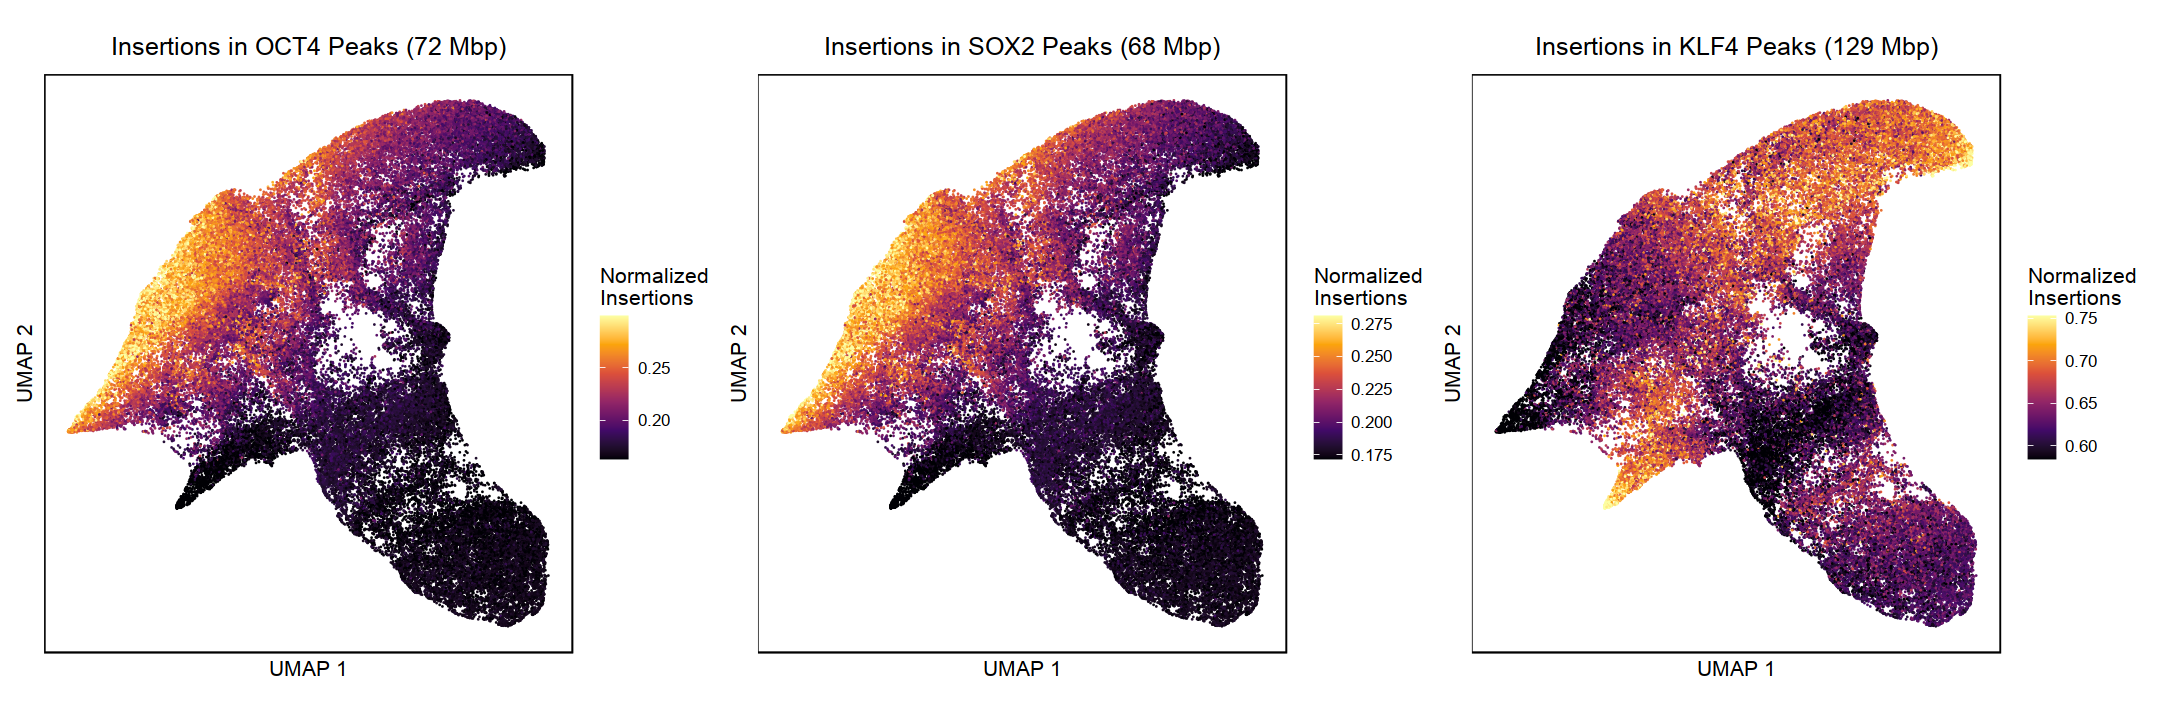

In [10]:
options(repr.plot.width = 18, repr.plot.height = 6)
frip_plots

### Row 1

In [25]:
row1_plots = wrap_plots(plot_spacer(),
                        vertical_spacers(placeholder_plot("MOTIFS", 10), c(.25,6.5,.25)),
                        plot_spacer(),
                      frip_plots,
                       plot_spacer(),
                       widths=c(0.5,4.5,0.5,21,0.5))

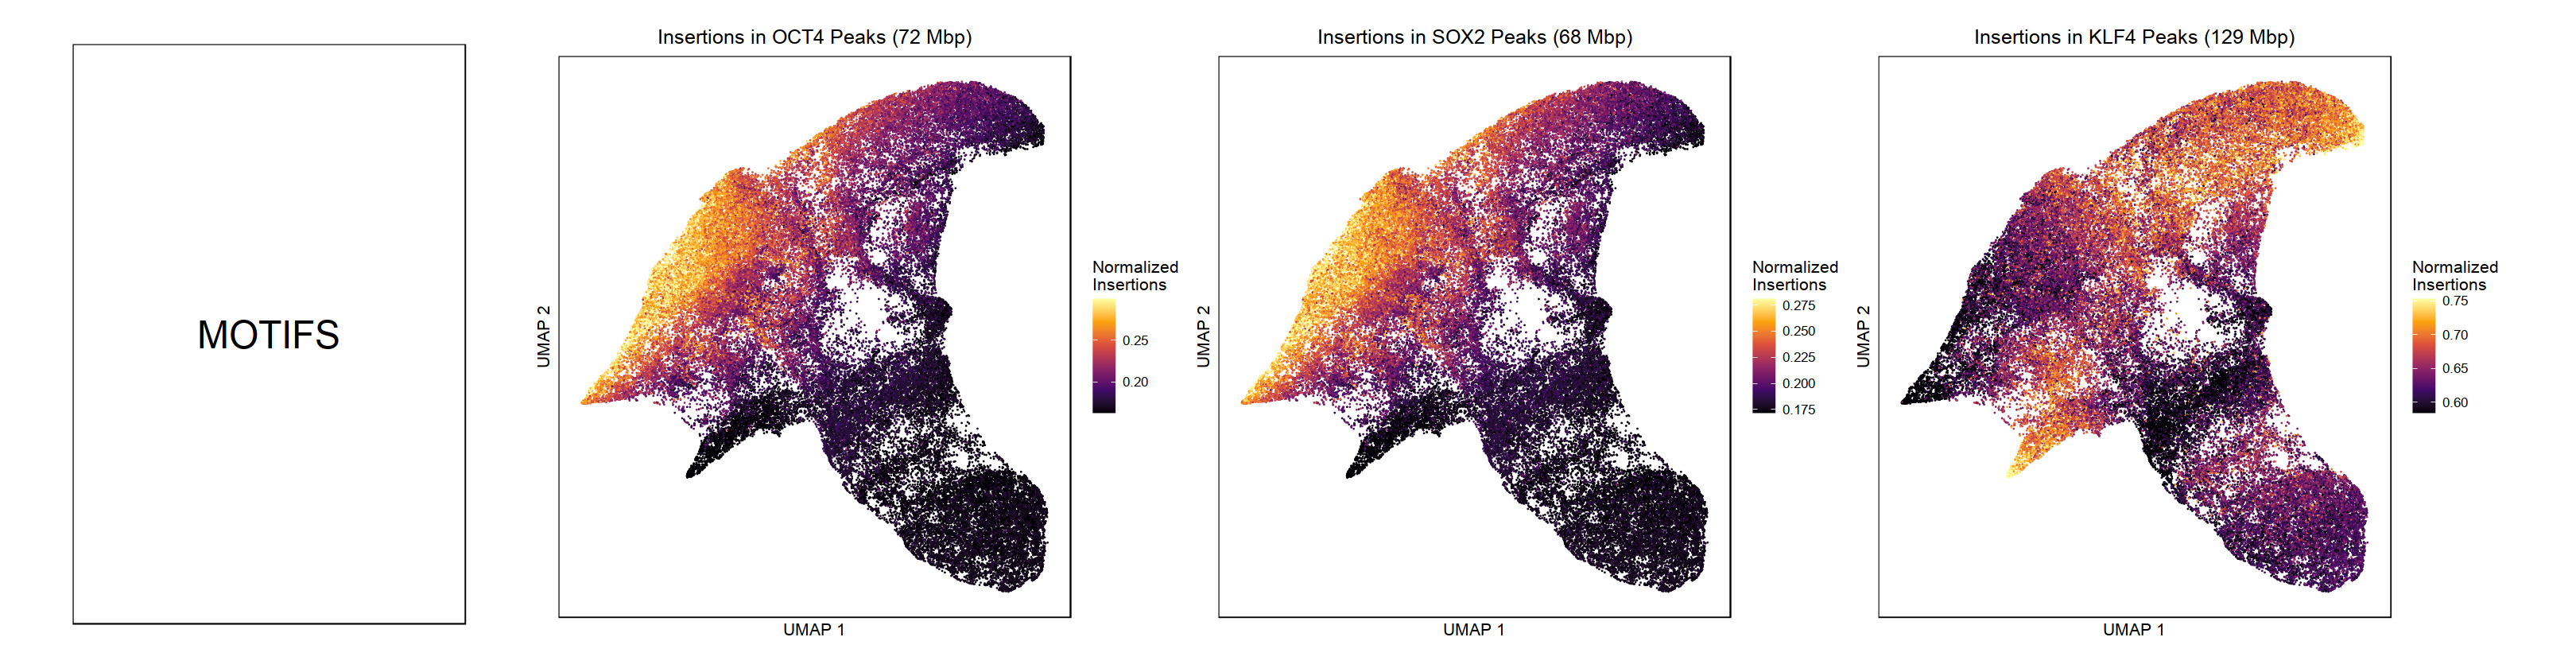

In [26]:
options(repr.plot.width = 27, repr.plot.height = 7)

row1_plots

### Browser Shots with Gene Scores

In [13]:
GS_TO_BROWSER_RATIO = c(10, 4)
GS_HORIZONTAL_SPACERS = c(1,6,1)

MAP2_combined = wrap_plots(MAP2,
                          horizontal_spacers(MAP2_gs,
                                            widths=GS_HORIZONTAL_SPACERS),
                          ncol=1,
                          heights=GS_TO_BROWSER_RATIO)
JAKMIP2_combined = wrap_plots(JAKMIP2,
                          horizontal_spacers(JAKMIP2_gs,
                                            widths=GS_HORIZONTAL_SPACERS),
                          ncol=1,
                          heights=GS_TO_BROWSER_RATIO)
KRT16_combined = wrap_plots(KRT16,
                          horizontal_spacers(KRT16_gs,
                                            widths=GS_HORIZONTAL_SPACERS),
                          ncol=1,
                          heights=GS_TO_BROWSER_RATIO)
KLK11_combined = wrap_plots(KLK11,
                          horizontal_spacers(KLK11_gs,
                                            widths=GS_HORIZONTAL_SPACERS),
                          ncol=1,
                          heights=GS_TO_BROWSER_RATIO)

In [14]:
cluster_label_df = cluster_config

BOTTOM_PT = nrow(cluster_label_df)+0.7

cluster_label_df[nrow(cluster_label_df)+1, ] = c(nrow(cluster_label_df)+1, "", "", 1)
cluster_label_df[nrow(cluster_label_df)+1, ] = c(nrow(cluster_label_df)+1, "", "", BOTTOM_PT)

# need to play around with these parameters to find the right fit
cluster_labels_plot <- ggplot(cluster_label_df) +
    geom_text(aes(x=0, y= -as.numeric(new_cluster), label=description, hjust=1, vjust=0.5)) +
    theme_void() +
    theme(plot.margin = unit(c(0,-400,0,0), "pt"))

# add to debug- shows how ggplot dots align with genome track labels
# for (i in seq(1,18)) {
#     cluster_labels_plot = cluster_labels_plot + geom_point(x=0, y= -i)
# }

# cluster_labels_plot = cluster_labels_plot + geom_point(x=0, y= -BOTTOM_PT, colour='red')

In [15]:
browser_shots = wrap_plots(plot_spacer(),
                    wrap_plots(cluster_labels_plot,
                               plot_spacer(),
                               ncol=1,
                               heights=GS_TO_BROWSER_RATIO),
                    plot_spacer(),
                    MAP2_combined,
                    JAKMIP2_combined,
                    plot_spacer(),
                    KRT16_combined,
                    KLK11_combined,
                    plot_spacer(),
                    widths=c(0,3,-1.7,6,6,1,6,6,0.5)) # negative spacer controls space between labels and first plot

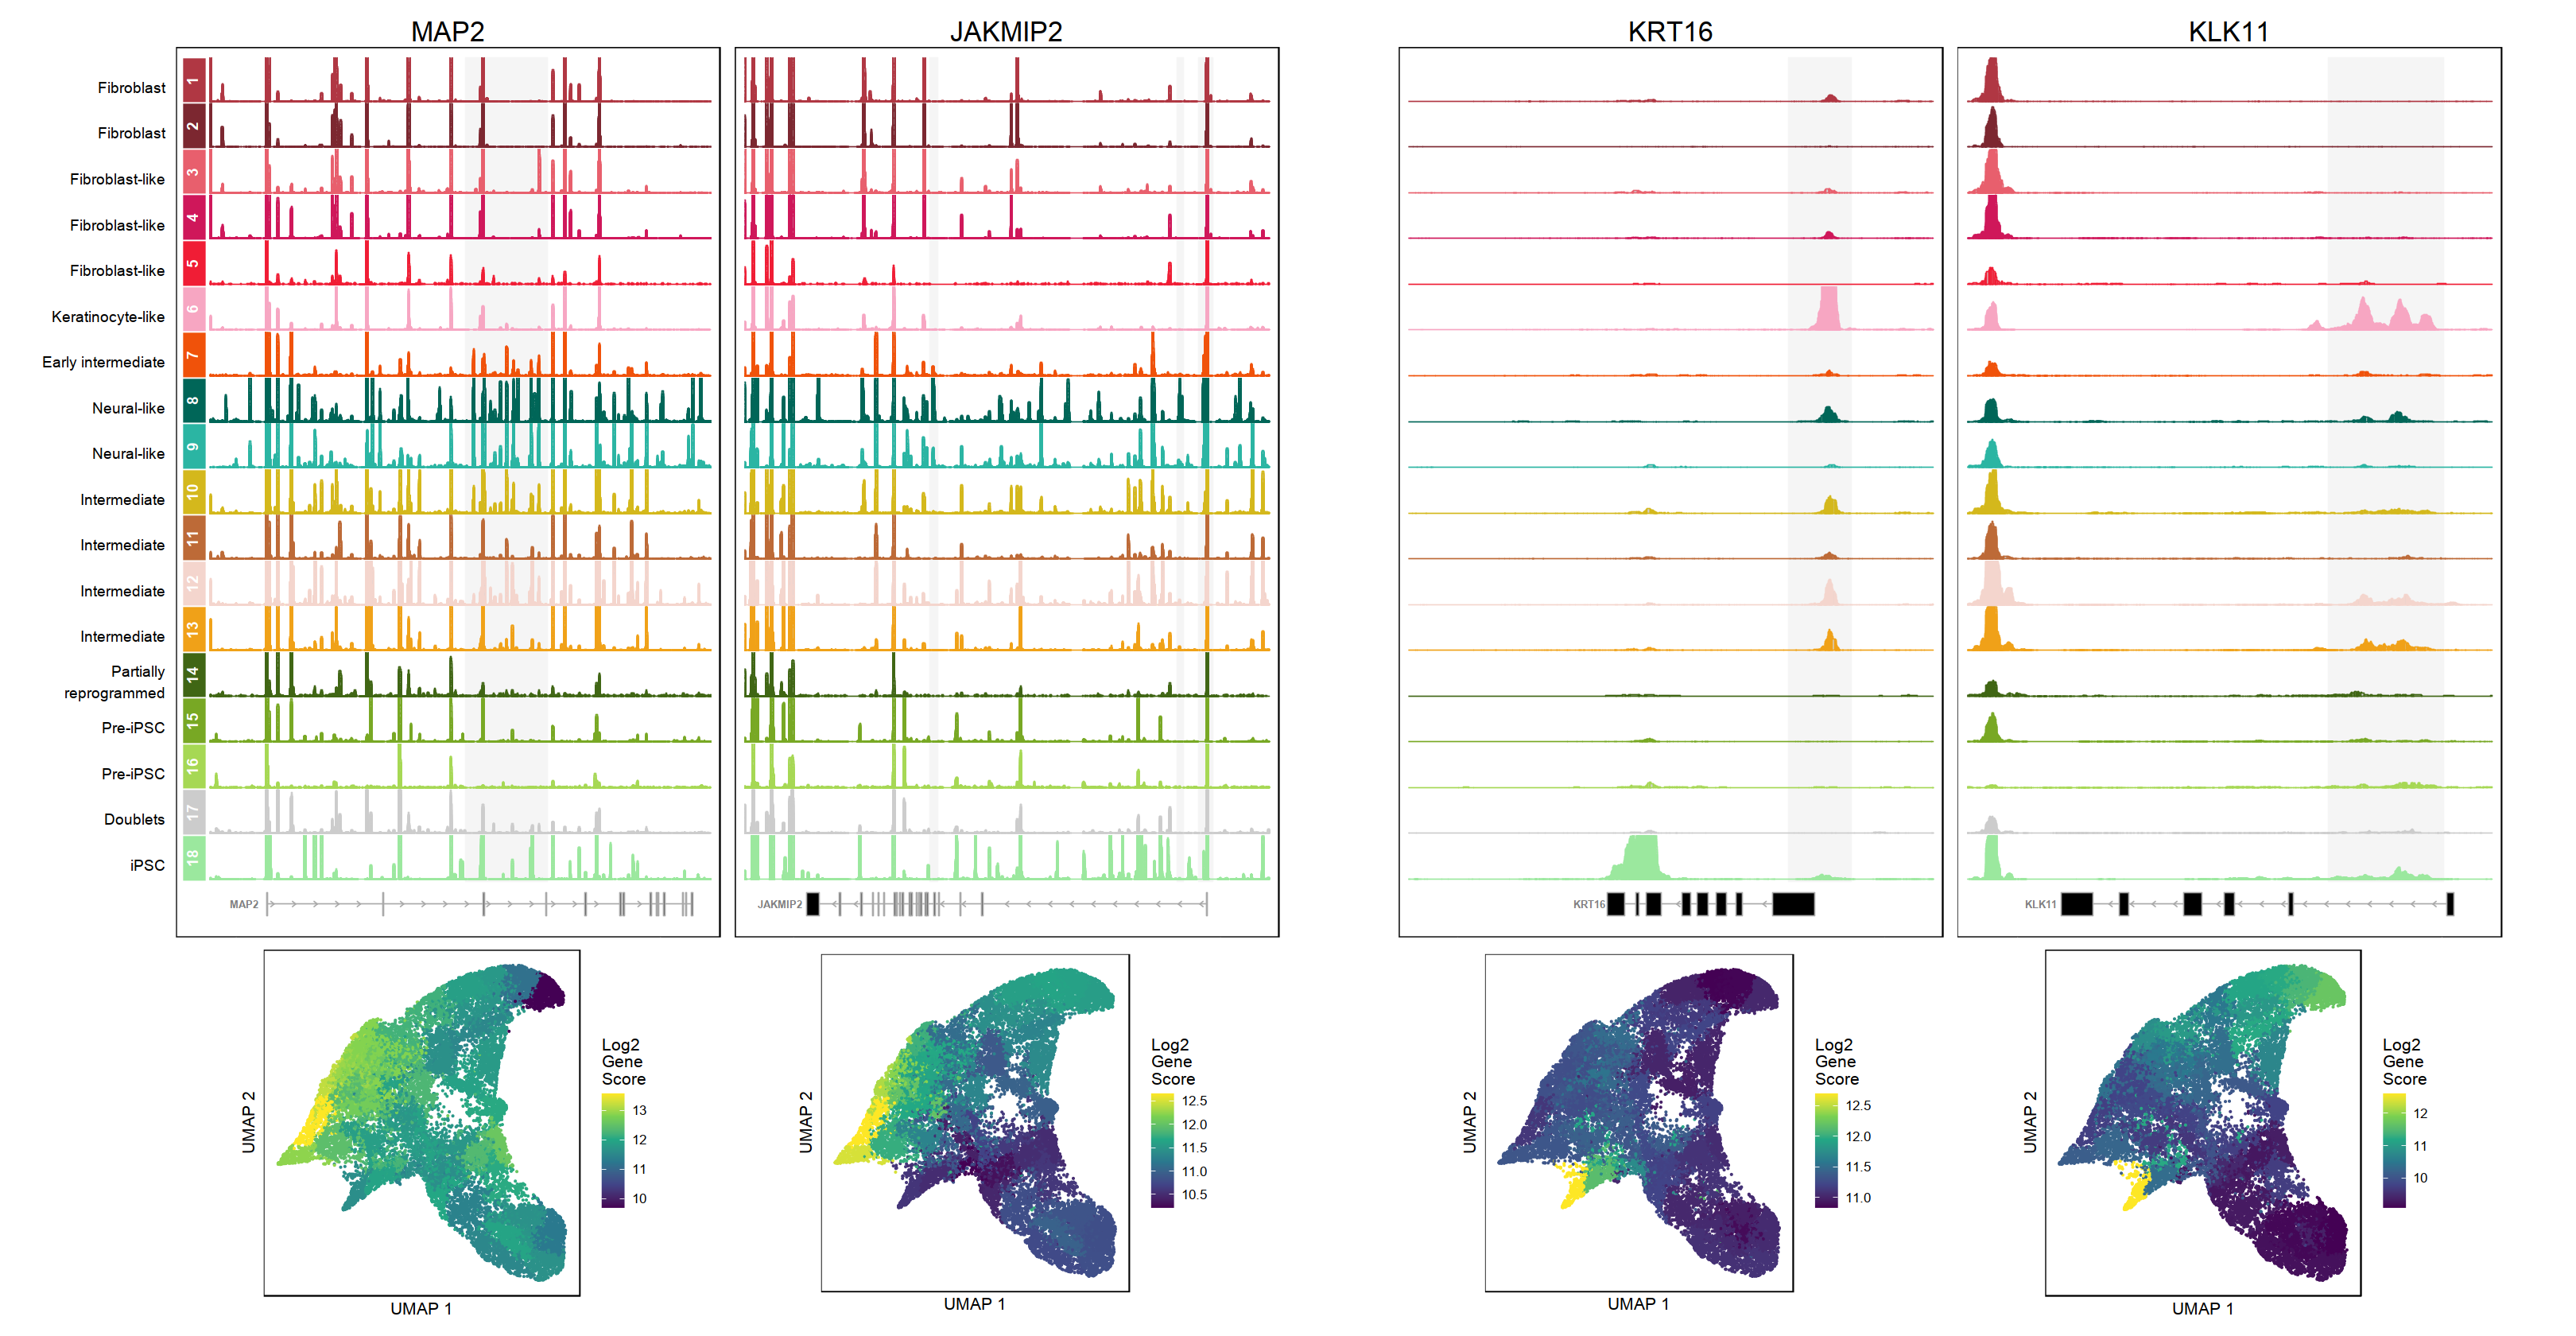

In [16]:
options(repr.plot.width = 27, repr.plot.height = 14)

# NB: alternative (highlighted) promoter currently used for gene score. Adjust accordingly.
browser_shots

## Assemble Master

In [27]:
main_fig = wrap_plots(row1_plots, 
                      browser_shots, 
                      ncol=1, heights=c(7,14))

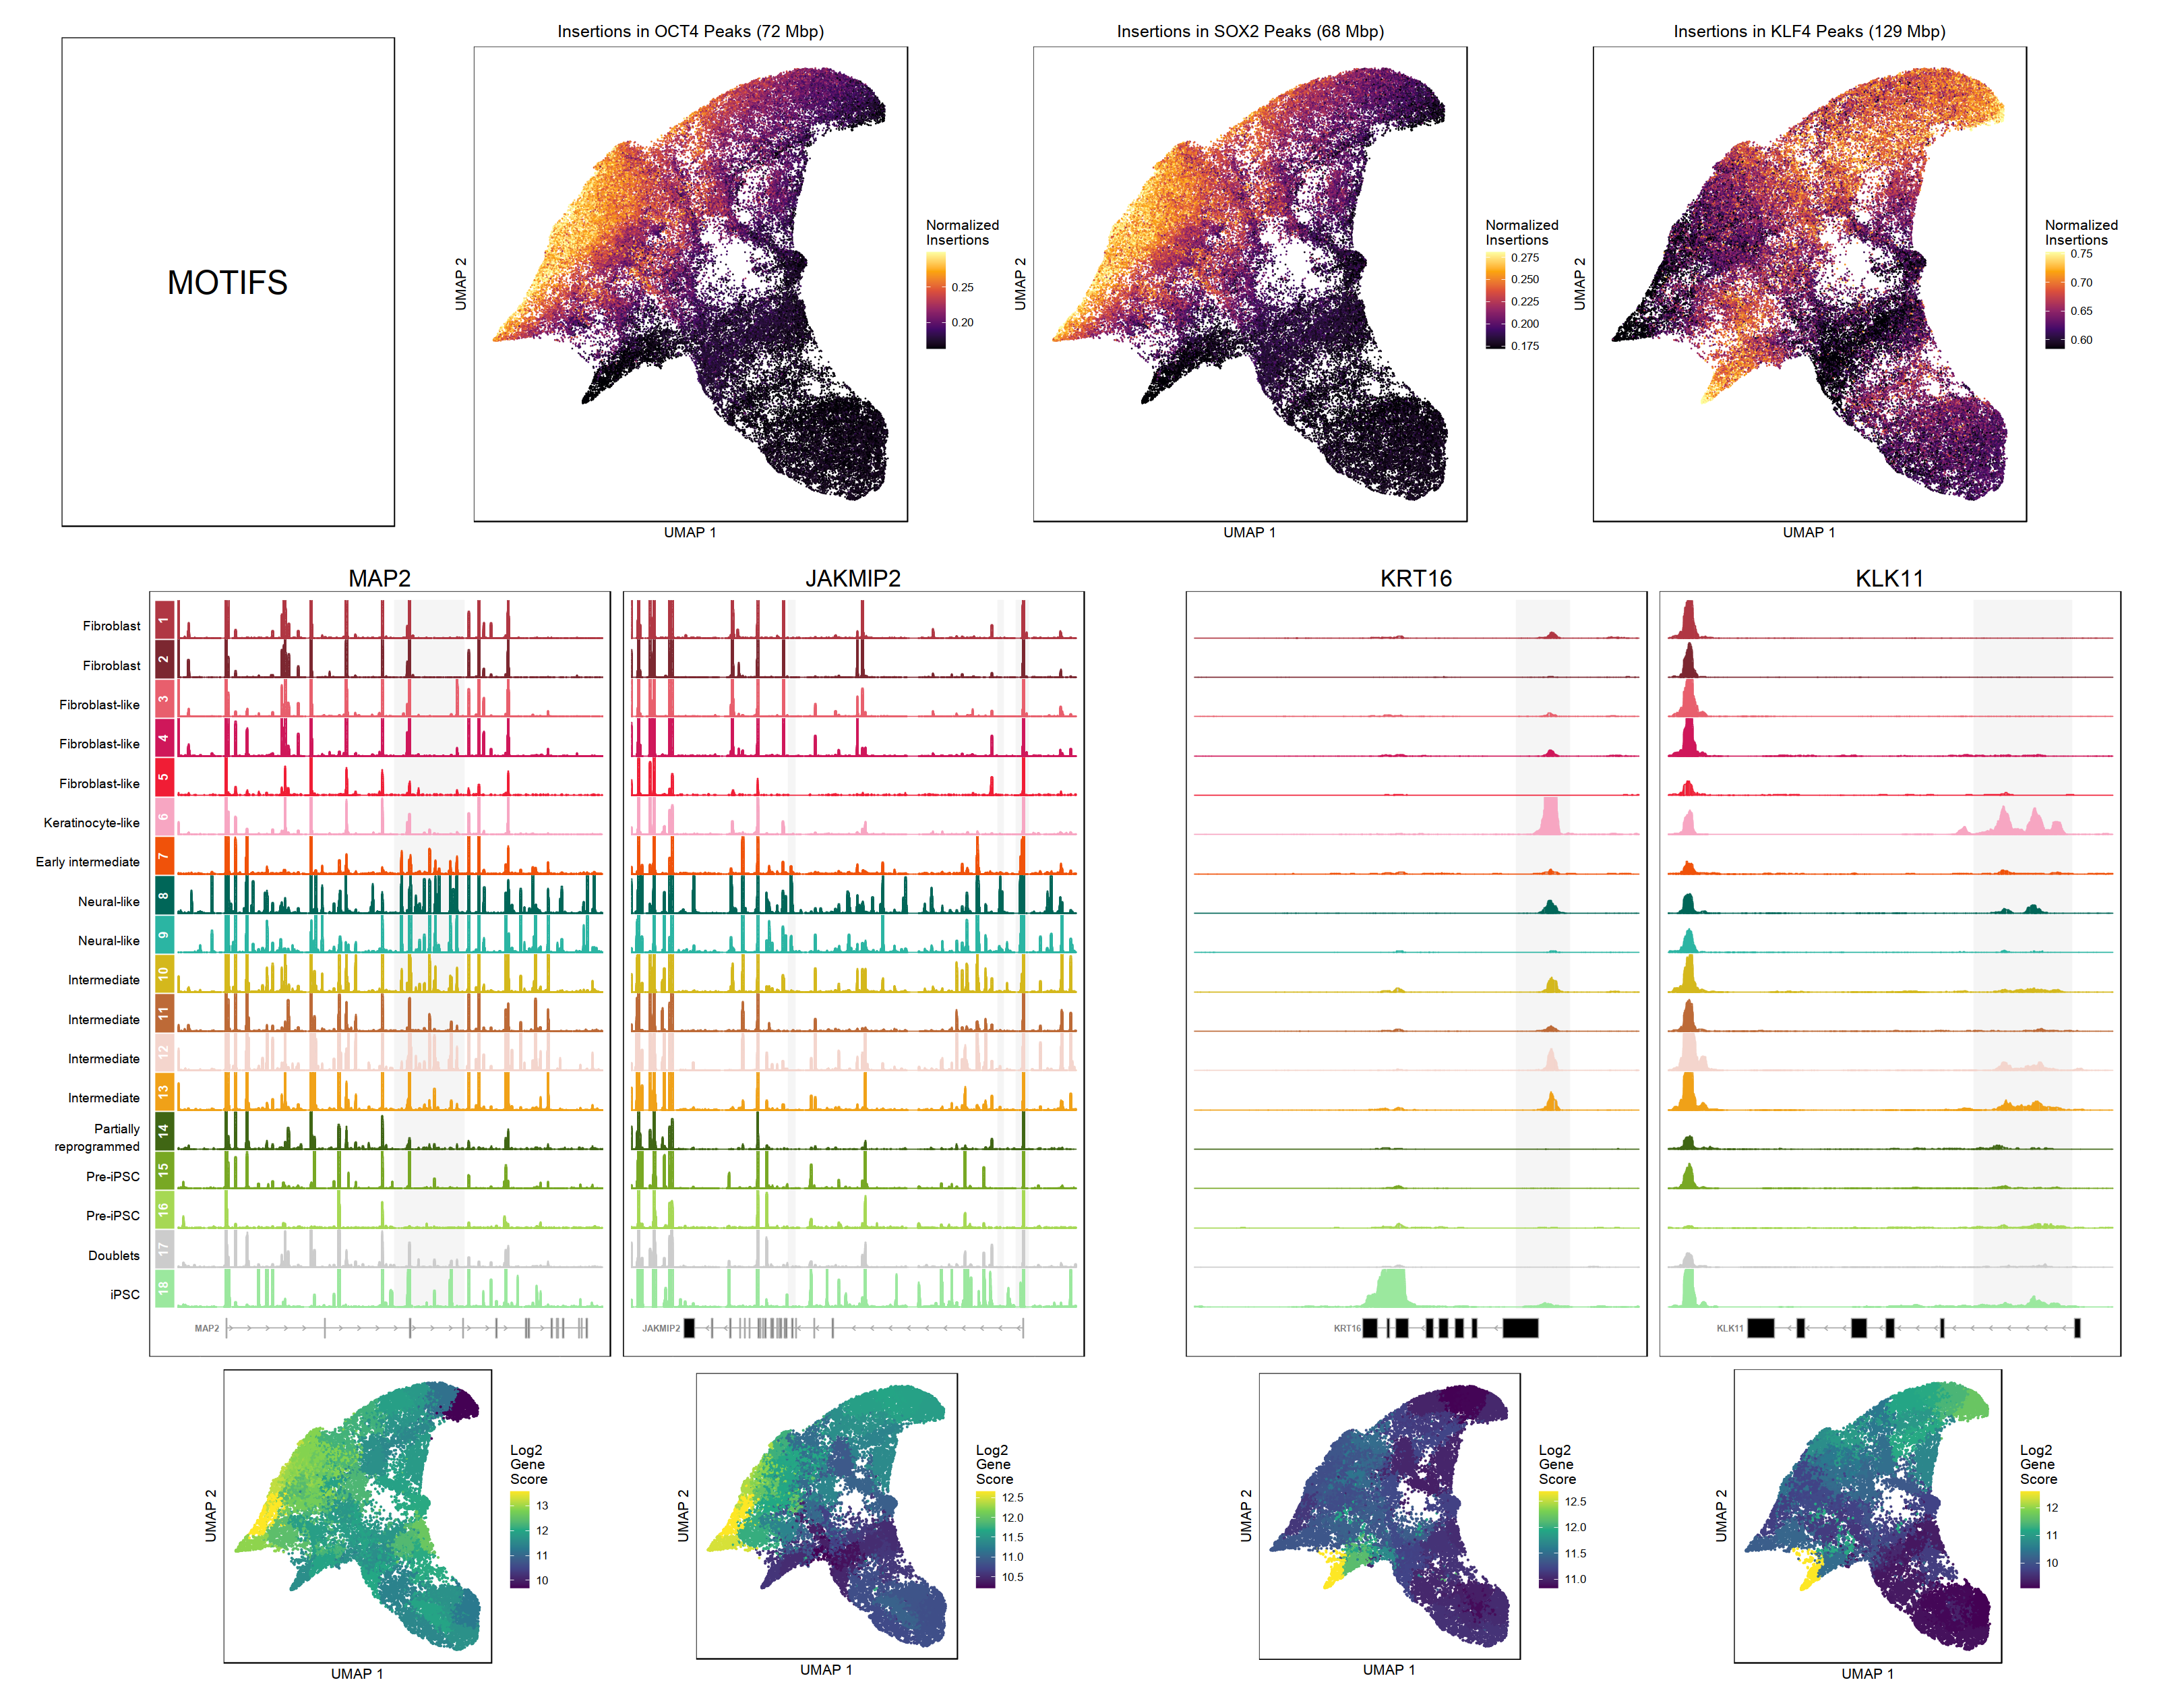

In [28]:
options(repr.plot.width = 27, repr.plot.height = 21)
main_fig